### 🎯  The aim of this project is to make an easy analysis and predict whether an aircraft will be delayed or cancelled

###   🏆   The dataset used in this research is the Kaggle competition dataset taken from the 2009 ASA Statistical Computing and Graphics Data Expo and available on:  https://www.kaggle.com/datasets/giovamata/airlinedelaycauses

# Exploratory data analysis

### 📈  Variables in dataset
 1. Year: 2008
 2. Month: 11 (November)
 3. DayofMonth: 1-31
 4. DayOfWeek: 1 (Monday) - 7 (Sunday)
 5. DepTime: actual departure time (hhmm)
 6. CRSDepTime: scheduled departure time (hhmm)
 7. ArrTime: actual arrival time (hhmm)
 8. CRSArrTime: scheduled arrival time (hhmm)
 9. UniqueCarrier: unique carrier code
 10. FlightNum: flight number
 11. TailNum: plane tail number
 12. ActualElapsedTime: actual elapsed time of flight (estimated elapse time) in minutes
 13. CRSElapsedTime: CRS elapsed time of flight (estimated elapse time) in minutes
 14. AirTime: flight time in in minutes
 15. ArrDelay: TARGET -  difference in minutes between scheduled and actual arrival time, in minutes
 16. DepDelay: difference in minutes between scheduled and actual departure time, in minutes
 17. Origin: origin IATA airport code
 18. Dest: destination IATA airport code
 19. Distance: distance between airports (miles)
 20. TaxiIn: wheels down and arrival at the destination airport gate, in minutes
 21. TaxiOut: The time elapsed between departure from the origin airport gate and wheels off, in minutes
 22. Cancelled: was the flight cancelled?
 23. CancellationCode: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
 24. Diverted: 1 = yes, 0 = no
 25. CarrierDelay: carrier delay in minutes
 26. WeatherDelay: weather delay in minutes
 27. NASDelay: NAS delay in minutes
 28. SecurityDelay: security delayin minutes
 29. LateAircraftDelay: late aircraft delay in minutes

### For EDA, I applied the Pandas-profiling library which visualizes almost everything you need for preliminary envestigation of your dataset: data types, missing values, duplicate rows, correlation matrix and much more. In some cases you have to additionally install Ipywidgets module.

In [ ]:
pip install pandas-profiling
pip install ipywidgets
import pandas_profiling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pandas_profiling
import sqlite3
%matplotlib inline

### We can load the full data from the file or a part of them

In [2]:
nRowsRead = None # specify number of rows to read - print None if want to read whole file
file_path = 'DelayedFlights.csv'
data = pd.read_csv(file_path, header=0, nrows=nRowsRead)
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1936758 rows and 30 columns


In [3]:
data.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [ ]:
data_profile = pandas_profiling.ProfileReport(data)
data_profile.to_file("EDA Dataset Report.html")

In [5]:
data.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [6]:
print(data.isna().sum())

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [7]:
#details of delay related columns
stat = data[['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay',
               'LateAircraftDelay']]

stat = stat.describe().T
stat

,count,mean,std,min,25%,50%,75%,max
ArrDelay,1928371.0,42.199885,56.784715,-109.0,9.0,24.0,56.0,2461.0
DepDelay,1936758.0,43.185176,53.402502,6.0,12.0,24.0,53.0,2467.0
CarrierDelay,1247488.0,19.179399,43.546207,0.0,0.0,2.0,21.0,2436.0
WeatherDelay,1247488.0,3.703571,21.492900,0.0,0.0,0.0,0.0,1352.0
NASDelay,1247488.0,15.021635,33.833052,0.0,0.0,2.0,15.0,1357.0
SecurityDelay,1247488.0,0.090137,2.022714,0.0,0.0,0.0,0.0,392.0
LateAircraftDelay,1247488.0,25.296466,42.054862,0.0,0.0,8.0,33.0,1316.0


### It is important to keep in mind that if a plane arrived in time then we say that the "delay" is equalled zero. Negative values means an earlier arrival

In [34]:
n_cancelled = (data['Cancelled'].sum() / len(data['Cancelled'])) * 100
print(f'Cancelled flights coprise {round(n_cancelled, 4)}%')

Cancelled flights coprise 0.0327%


In [33]:
n_cancelled = (data['Diverted'].sum() / len(data['Cancelled'])) * 100
print(f'Diverted flights coprise {round(n_cancelled, 4)}%')

Diverted flights coprise 0.4004%


In [8]:
pv_table = pd.pivot_table(data,index=["Cancelled"],values= [
       'UniqueCarrier', 'FlightNum', 'TailNum',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
               aggfunc=np.sum)
pv_table

,CarrierDelay,DepDelay,Distance,Diverted,FlightNum,LateAircraftDelay,NASDelay,SecurityDelay,TaxiIn,TaxiOut,WeatherDelay
Cancelled,,,,,,,,,,,
0,23926070.0,83580974.0,1482565872,7754,4228383916,31557038.0,18739310.0,112445.0,13146644.0,35298774.0,4620160.0
1,0.0,58262.0,382922,0,2005381,0.0,0.0,0.0,0.0,4295.0,0.0


In [9]:
canceled = data[['Cancelled','CancellationCode','ArrDelay','DepDelay']]
canceled =canceled[canceled['Cancelled']==1] #  select only cancelled flights

#explore cancelation data
print(canceled)
print(canceled.isna().sum()) #sum of NA's

         Cancelled CancellationCode  ArrDelay  DepDelay
1542406          1                A       NaN     122.0
1546593          1                B       NaN      28.0
1547161          1                C       NaN      10.0
1547178          1                B       NaN      18.0
1548271          1                B       NaN     118.0
...            ...              ...       ...       ...
1934590          1                A       NaN      42.0
1935491          1                C       NaN       9.0
1935651          1                A       NaN      12.0
1935876          1                A       NaN      31.0
1936470          1                B       NaN      33.0

[633 rows x 4 columns]
Cancelled             0
CancellationCode      0
ArrDelay            633
DepDelay              0
dtype: int64


### Cancelled flights aren't delayed ones!

In [10]:
diverted = data[['Diverted','ArrDelay','DepDelay']]
diverted =diverted[diverted['Diverted']==1] #  select only cancelled flights

#explore data
print(diverted)
print(diverted.isna().sum()) #sum of NA's

         Diverted  ArrDelay  DepDelay
1280            1       NaN       7.0
1372            1       NaN     265.0
1776            1       NaN      44.0
1831            1       NaN      32.0
2244            1       NaN     139.0
...           ...       ...       ...
1934369         1       NaN     163.0
1934921         1       NaN      52.0
1935596         1       NaN      34.0
1935716         1       NaN     169.0
1935978         1       NaN       7.0

[7754 rows x 3 columns]
Diverted       0
ArrDelay    7754
DepDelay       0
dtype: int64


### Neither are diverted ones!

In [11]:
for i in ["Origin", "Dest", "CancellationCode"]:
    print(i)
    print(round(data[i].value_counts()*100/len(data),2),'\n')

Origin
ATL    6.80
ORD    6.50
DFW    4.93
DEN    3.84
LAX    3.03
       ... 
BJI    0.00
PIR    0.00
PUB    0.00
INL    0.00
TUP    0.00
Name: Origin, Length: 303, dtype: float64 

Dest
ORD    5.63
ATL    5.52
DFW    3.65
DEN    3.25
LAX    3.10
       ... 
INL    0.00
PIR    0.00
CYS    0.00
TUP    0.00
OGD    0.00
Name: Dest, Length: 304, dtype: float64 

CancellationCode
N    99.97
B     0.02
A     0.01
C     0.00
Name: CancellationCode, dtype: float64 



### Cancellation Code "N" occurs more frequintly

### Lets take a deep look at delayed flights

<AxesSubplot:>

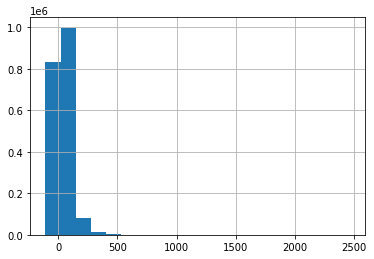

In [12]:
data['ArrDelay'].hist(bins=20)

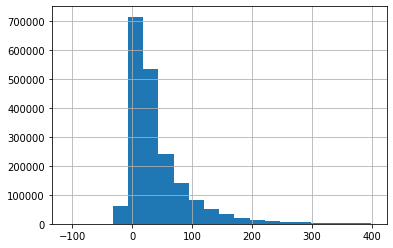

In [13]:
data[ data['ArrDelay'] < 400 ]['ArrDelay'].hist(bins=20);

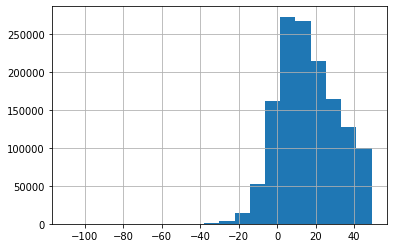

In [14]:
data[ data['ArrDelay'] < 50 ]['ArrDelay'].hist(bins=20);

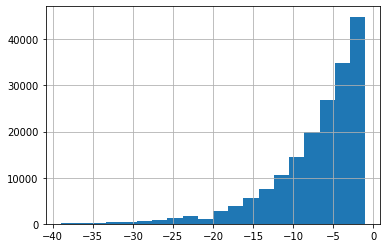

In [15]:
data[(data['ArrDelay'] < 0) & (data['ArrDelay'] > -40) ]['ArrDelay'].hist(bins=20);

In [39]:
mean_delay = data[ data['ArrDelay'] > 0 ]['ArrDelay'].mean()
print(f'Mean delay without earlier arrivals coprises {round(mean_delay, 1)} min')

Mean delay without earlier arrivals coprises 47.9 min


In [42]:
mean_earlies = data[ data['ArrDelay'] < 0 ]['ArrDelay'].mean()
print(f'Flights arrive earlier (if any) at average in {round(mean_earlies, 1) * (-1)} min')

Flights arrive earlier (if any) at average in 6.9 min


Text(0.5, 1.0, 'Percent of real delays (without earlier arrivals) out of total flights')

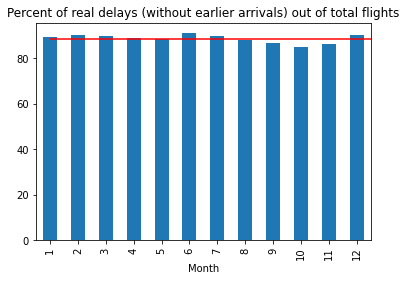

In [74]:
real_delays = data[ data['ArrDelay'] > 0 ][['ArrDelay', 'Month']].groupby('Month').agg('count')
flights_per_month = data[ data['DayofMonth'] > 0 ][['DayofMonth', 'Month']].groupby('Month').agg('count')
percent_delays = real_delays.join(flights_per_month)
percent_delays['percent'] = percent_delays['ArrDelay'] / percent_delays['DayofMonth'] *100
percent_delays['percent'].plot(kind="bar")
plt.hlines(y=np.mean(percent_delays['percent']), xmin=0, xmax=12, color="red")
plt.title("Percent of real delays (without earlier arrivals) out of total flights")

Text(0.5, 1.0, 'Percent of fligths that arrived earlier out of total flights')

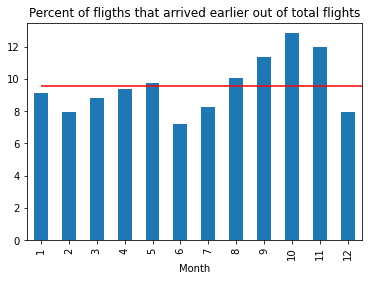

In [75]:
arrived_earlier = data[ data['ArrDelay'] < 0 ][['ArrDelay', 'Month']].groupby('Month').agg('count')
flights_per_month = data[ data['DayofMonth'] > 0 ][['DayofMonth', 'Month']].groupby('Month').agg('count')
percent_early_arrivals = arrived_earlier.join(flights_per_month)
percent_early_arrivals['percent'] = percent_early_arrivals['ArrDelay'] / percent_early_arrivals['DayofMonth'] *100
percent_early_arrivals['percent'].plot(kind="bar")
plt.hlines(y=np.mean(percent_early_arrivals['percent']), xmin=0, xmax=12, color="red")
plt.title("Percent of fligths that arrived earlier out of total flights")

### Lets investigate cancelled flights

In [17]:
data["Cancelled"].value_counts(normalize=True)

0    0.999673
1    0.000327
Name: Cancelled, dtype: float64

In [16]:
data["Cancelled"].value_counts() # look at cancelled flights

0    1936125
1        633
Name: Cancelled, dtype: int64

<AxesSubplot:xlabel='Month'>

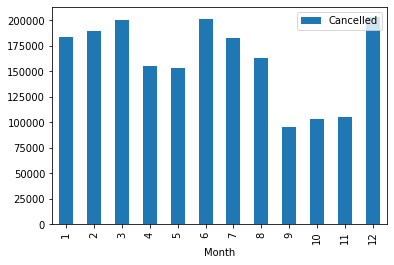

In [18]:
data[ ['Month', "Cancelled"] ].groupby('Month').agg('count').plot(kind="bar")

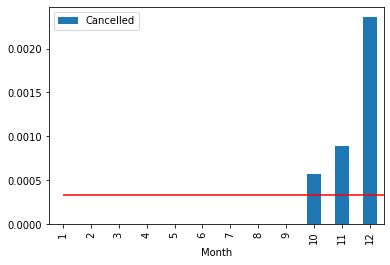

In [19]:
 # the probability that the plane is delayed
data[ ['Month', "Cancelled"] ].groupby('Month').agg('mean').plot(kind="bar")
plt.hlines(y=np.mean(data[ "Cancelled"]), xmin=0, xmax=12, color="red")

### You can see that in November - December the probability of flight being cancelled is much higher than for the rest months

In [20]:
data["DayOfWeek"].value_counts()

5    323259
1    290933
4    289451
7    286111
3    262805
2    260943
6    223256
Name: DayOfWeek, dtype: int64

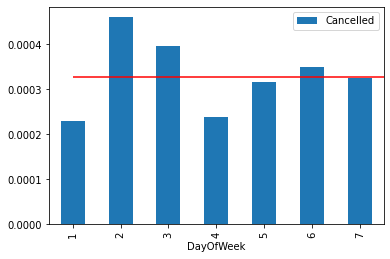

In [21]:
data[ ['DayOfWeek', "Cancelled"] ].groupby('DayOfWeek').agg('mean').plot(kind="bar")
plt.hlines(y=np.mean(data[ "Cancelled"]), xmin=0, xmax=7, color="red")

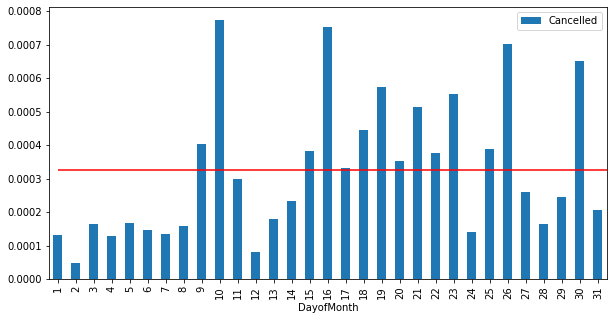

In [22]:
data[ ['DayofMonth', "Cancelled"] ].groupby('DayofMonth').agg('mean').plot(kind="bar", figsize = (10, 5))
plt.hlines(y=np.mean(data[ "Cancelled"]), xmin=0, xmax=31, color="red")

<AxesSubplot:xlabel='UniqueCarrier', ylabel='count'>

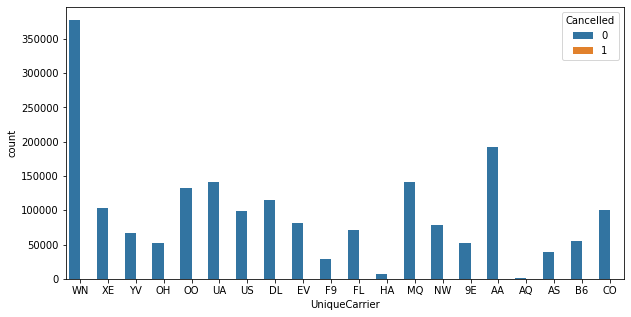

In [23]:
# Lets look at different Carriers
plt.figure(figsize=(10,5))
sns.countplot(x='UniqueCarrier',hue='Cancelled',data=data)

<AxesSubplot:xlabel='CancellationCode', ylabel='count'>

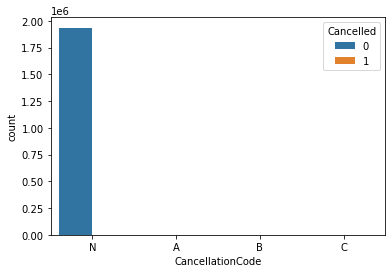

In [24]:
plt.figure()
sns.countplot(x='CancellationCode',hue='Cancelled',data=data)

In [25]:
data[ ['Distance', "Cancelled"] ].groupby("Cancelled").agg(['mean', 'median', 'min', 'max'])

Distance                 
                 mean median min   max
Cancelled                             
0          765.738716  606.0  11  4962
1          604.932070  419.0  67  2677

### short-distance flights are more likely to be canceled

In [26]:
data[ ['DepTime', "Cancelled"] ].groupby("Cancelled").agg(['mean', 'median'])

DepTime        
                  mean  median
Cancelled                     
0          1518.515542  1545.0
1          1575.347551  1650.0

## Conclusion
### There is quite a lot of data (1,936,758 rows). The data contains up to 689270 values for some variables, 2 duplicated rows. The cancelled fligths account less than 0.04 % of the total flights, and diverted ones - 0.4%. Cancelled flights are considered neither delayed not diverted ones. About 90 % of fligths are delayed and about 10% arrive earlier. Mean delay without earlier arrivals coprises 48 min. And flights arrive earlier (if any) at average in 7 min. Most of delayed flights belong to N-type. Any other types (A, B, and C) of delays take place only in October-December when the probability of flights being cancelled is also increasing.